# `specaug.py`

## Setup

In [1]:
import math
import sys

import einops
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import torch

sys.path.append('../scripts/')

from utils import get_ax, set_seaborn_whitegrid_ticks
from specaug import spec_augment

set_seaborn_whitegrid_ticks()

## `spec_augment`

/Users/sky/Projects/leaf_phase/notebooks/../scripts/imwarp.py:343: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  X, LU = torch.solve(rhs, lhs)  # X.shape=(b, n + d + 1, k)


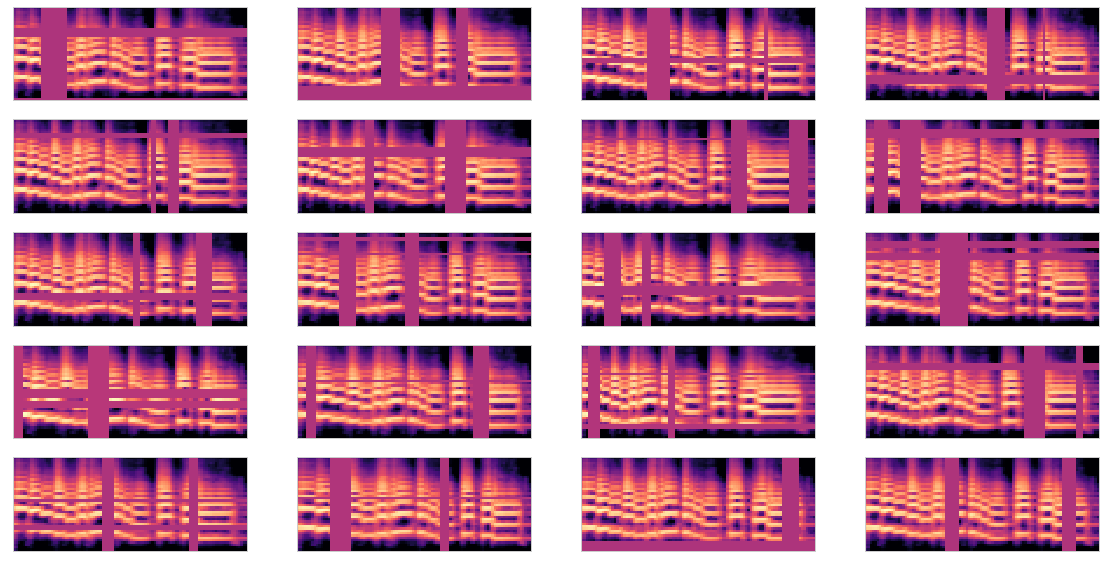

In [2]:
################################################################################
### Configuration
################################################################################
W = 8+1
F = 4+1
T = 10+1
mask_value = None

n_bins = 40
n_frames = 100

n_rows = 5
n_cols = 4

################################################################################
### Processing
################################################################################
S = librosa.feature.melspectrogram(librosa.load(librosa.ex('trumpet'), sr=16000)[0], n_mels=n_bins)
S = S[:, :n_frames]
S = librosa.power_to_db(S, ref=np.min)
S = torch.from_numpy(S)[None, None, :, ]
S = einops.repeat(S, 'b c f t -> (tile b) c f t', tile=n_rows*n_cols)
S = spec_augment(S, W=W, F=F, T=T, mask_value=None)
S = S.squeeze().numpy()

h = 4 * n_bins/max(n_bins, n_frames)
w = 4 * n_frames/max(n_bins, n_frames)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*w, n_rows*h), sharex=True, sharey=True)

for i in range(n_rows):
    for j in range(n_cols):
        ax = get_ax(axes, i, j, n_rows, n_cols)
        librosa.display.specshow(S[i*n_cols+j], ax=ax)
        ax.set_aspect('equal', adjustable='box')

fig.tight_layout()

***

*End*